In [1]:
options(width=200, repr.plot.width=11, repr.plot.height=7) 

# Úkoly

V rámci cvičení provedeme analýzu datasetu o tučňácích z knihovny `palmerpenguins`

https://cran.r-project.org/web/packages/palmerpenguins/index.html

Budeme zkoumat délku zobáku tučňáků v závislosti na různých spojitých i kategoriálních vysvětlujících proměnných.

## Úkol 1.a: Příprava dat

Nejprve je třeba načíst a připravit data.

**Data pro analýzu:**
- knihovna: `palmerpenguins`
- dataset `penguins`

**Vysvětlovaná proměnná**
- `bill_length_mm` - délka zobáku v milimetrech

**Regresory**
- `flipper_length_mm` - délka křídel v milimetrech
- `body_mass_g` - váha tučňáka v gramech - zkoumaná proměnná. 
- `species` - druh tučňáka, kategorická proměnná s úrovněmi Adelie, Chinstrap a Gentoo  
- `sex` - pohlaví tučňáka - kategorická proměnná s úrovněmi male, female, NA 
- `island` - ostrov, kde se tučňák vyskytuje - kategorická proměnná s úrovněmi Biscoe, Dream a Torgersen

Dataset upravte, aby neobsahoval řádky s tučňáky s neznámým pohlavím.

In [2]:
## pokud je potreba, nainstalujeme knihovnu
## install.packages("palmerpenguins") 
library(palmerpenguins)
dat=subset(penguins, sex!="NA")

## Úkol 1.b: Průzkum dat

Prozkoumejte jednotlivé proměnné - u spojitých proměnných najděte základní popisné statistiky, u faktorových zjistěte, kolik je záznamů v každé kategorii.

In [3]:
summary(dat)

      species          island    bill_length_mm  bill_depth_mm   flipper_length_mm  body_mass_g       sex           year     
 Adelie   :146   Biscoe   :163   Min.   :32.10   Min.   :13.10   Min.   :172       Min.   :2700   female:165   Min.   :2007  
 Chinstrap: 68   Dream    :123   1st Qu.:39.50   1st Qu.:15.60   1st Qu.:190       1st Qu.:3550   male  :168   1st Qu.:2007  
 Gentoo   :119   Torgersen: 47   Median :44.50   Median :17.30   Median :197       Median :4050                Median :2008  
                                 Mean   :43.99   Mean   :17.16   Mean   :201       Mean   :4207                Mean   :2008  
                                 3rd Qu.:48.60   3rd Qu.:18.70   3rd Qu.:213       3rd Qu.:4775                3rd Qu.:2009  
                                 Max.   :59.60   Max.   :21.50   Max.   :231       Max.   :6300                Max.   :2009  

## Úkol 1.c: Závislost délky zobáku na jednotlivých regresorech zvlášť

Prozkoumejte číselně i graficky délku zobáku tučňáků v závislosti na jednotlivých regresorech zvlášť.


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = dat)

Coefficients:
      (Intercept)  flipper_length_mm  
          -7.2186             0.2548  


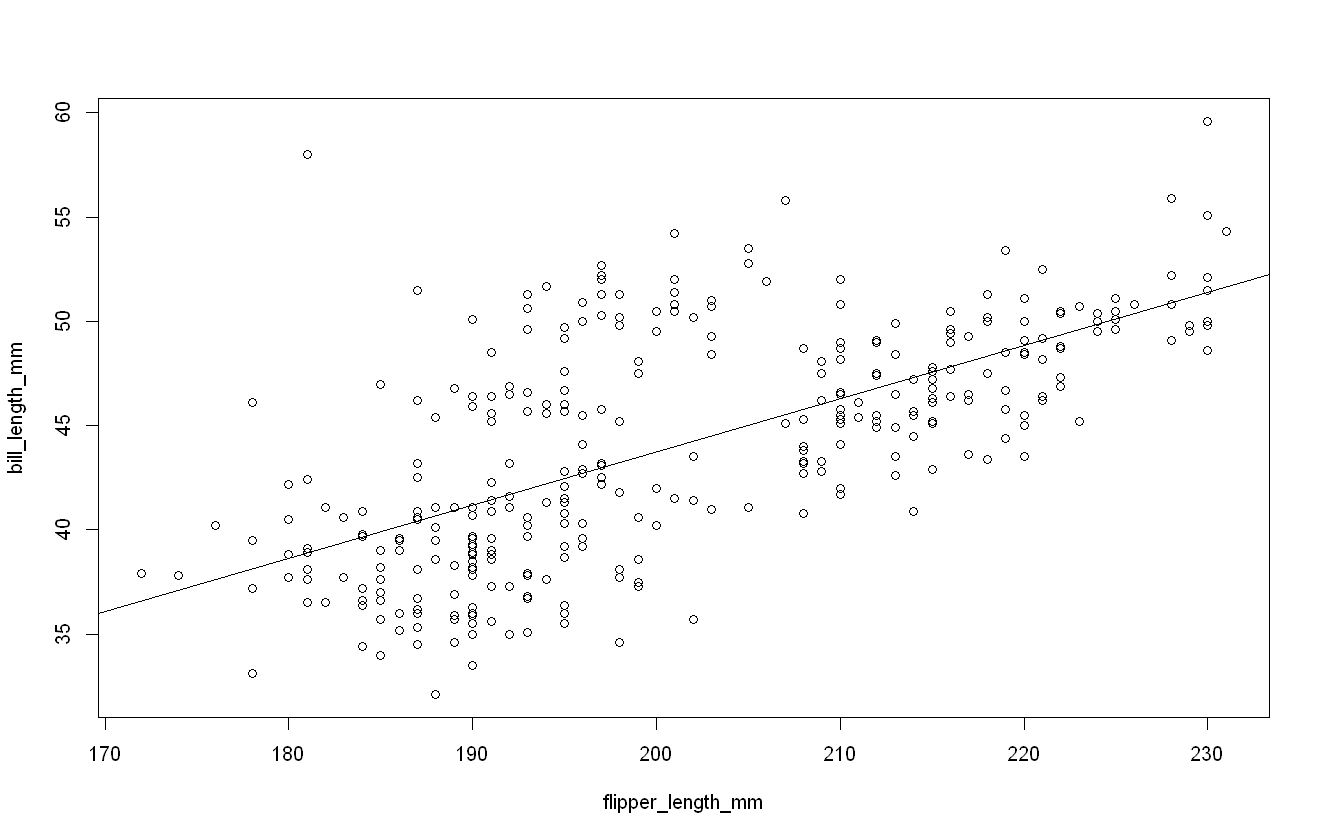

In [4]:
## zavislost na delce kridla
lm(bill_length_mm~flipper_length_mm,data=dat)
plot(bill_length_mm~flipper_length_mm,data=dat)
abline(lm(bill_length_mm~flipper_length_mm,data=dat))


Call:
lm(formula = bill_length_mm ~ body_mass_g, data = dat)

Coefficients:
(Intercept)  body_mass_g  
  27.150722     0.004003  


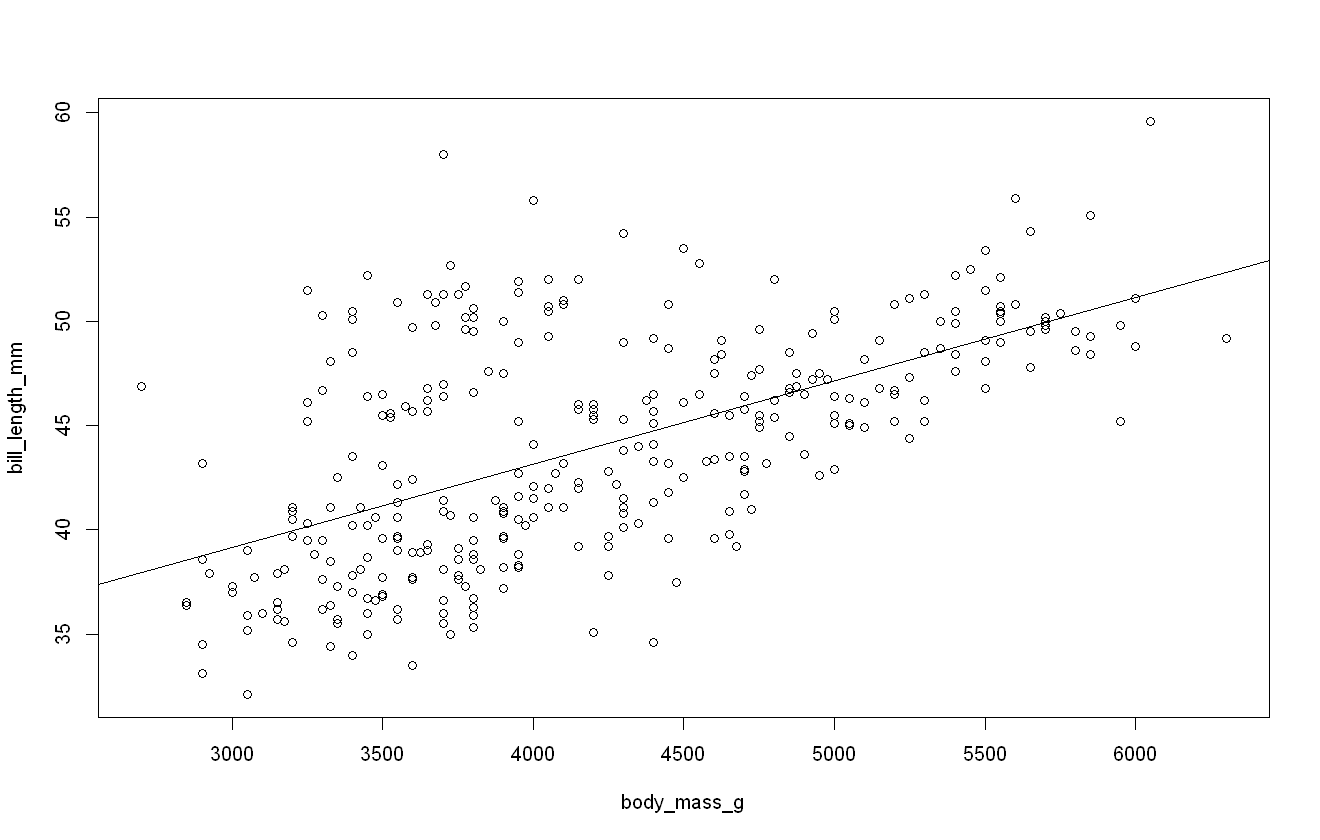

In [5]:
## zavislost na vaze
lm(bill_length_mm~body_mass_g,data=dat)
plot(bill_length_mm~body_mass_g,data=dat)
abline(lm(bill_length_mm~body_mass_g,data=dat))


Call:
lm(formula = bill_length_mm ~ species, data = dat)

Coefficients:
     (Intercept)  speciesChinstrap     speciesGentoo  
          38.824            10.010             8.744  


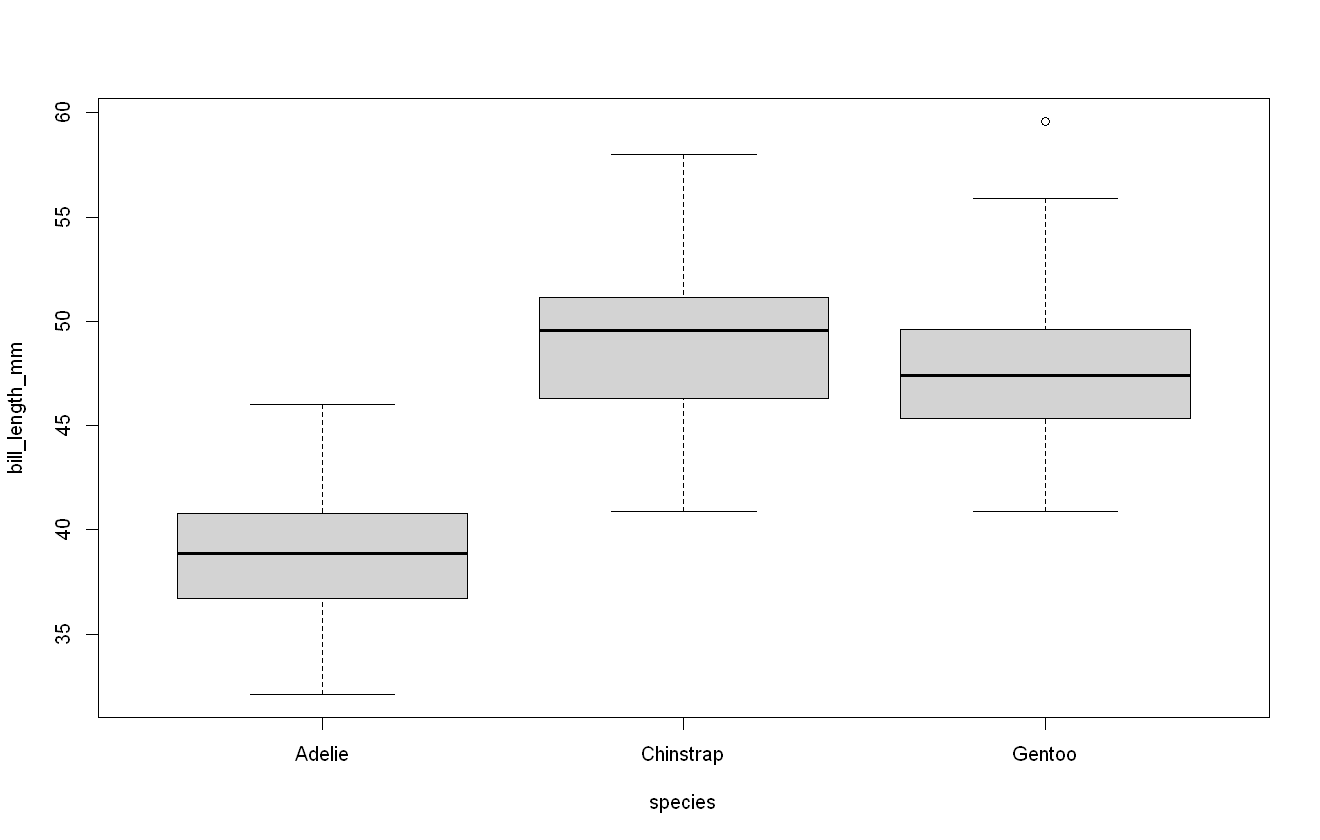

In [6]:
## zavislost na druhu
lm(bill_length_mm~species,data=dat)
boxplot(bill_length_mm~species,data=dat)


Call:
lm(formula = bill_length_mm ~ sex, data = dat)

Coefficients:
(Intercept)      sexmale  
     42.097        3.758  


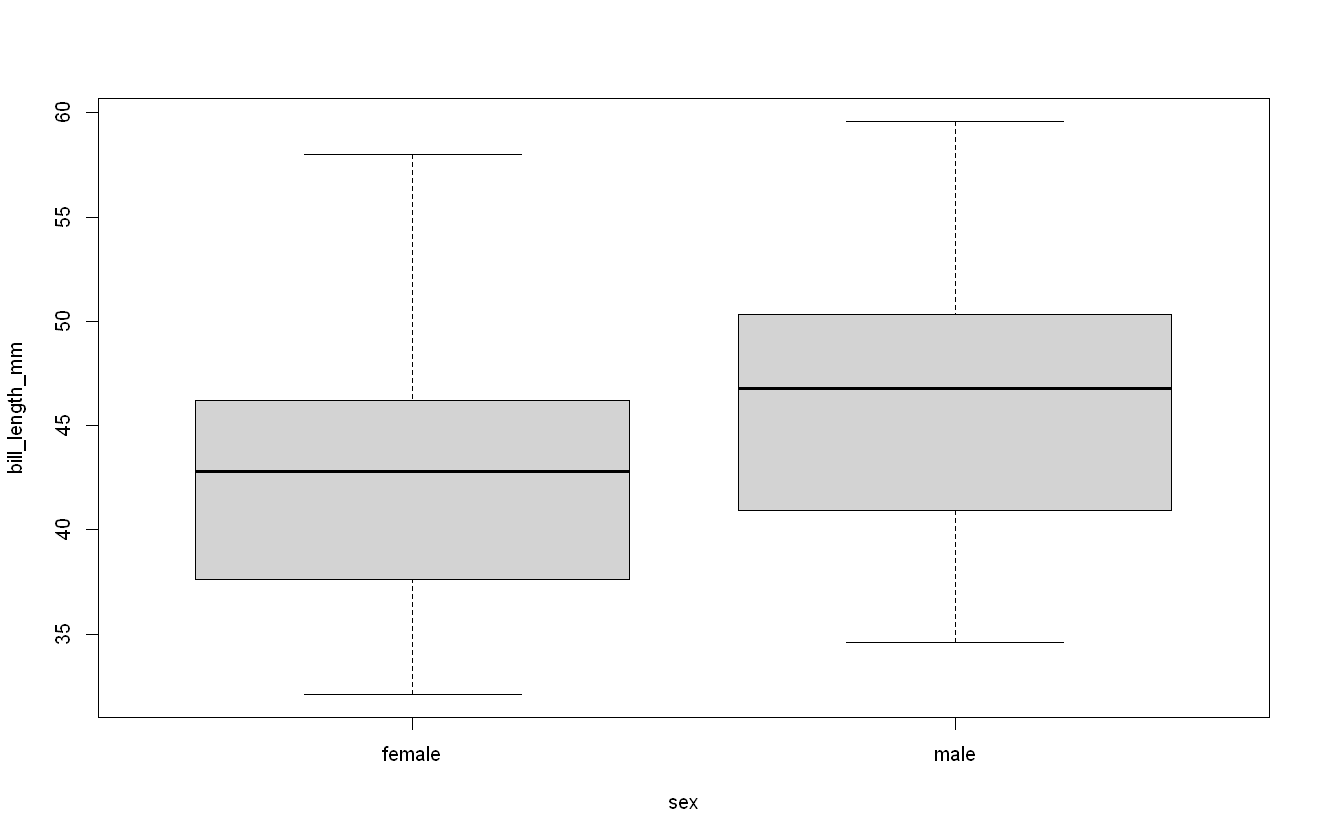

In [7]:
## zavislost na pohlavi
lm(bill_length_mm~sex,data=dat)
boxplot(bill_length_mm~sex,data=dat)


Call:
lm(formula = bill_length_mm ~ island, data = dat)

Coefficients:
    (Intercept)      islandDream  islandTorgersen  
         45.248           -1.027           -6.210  


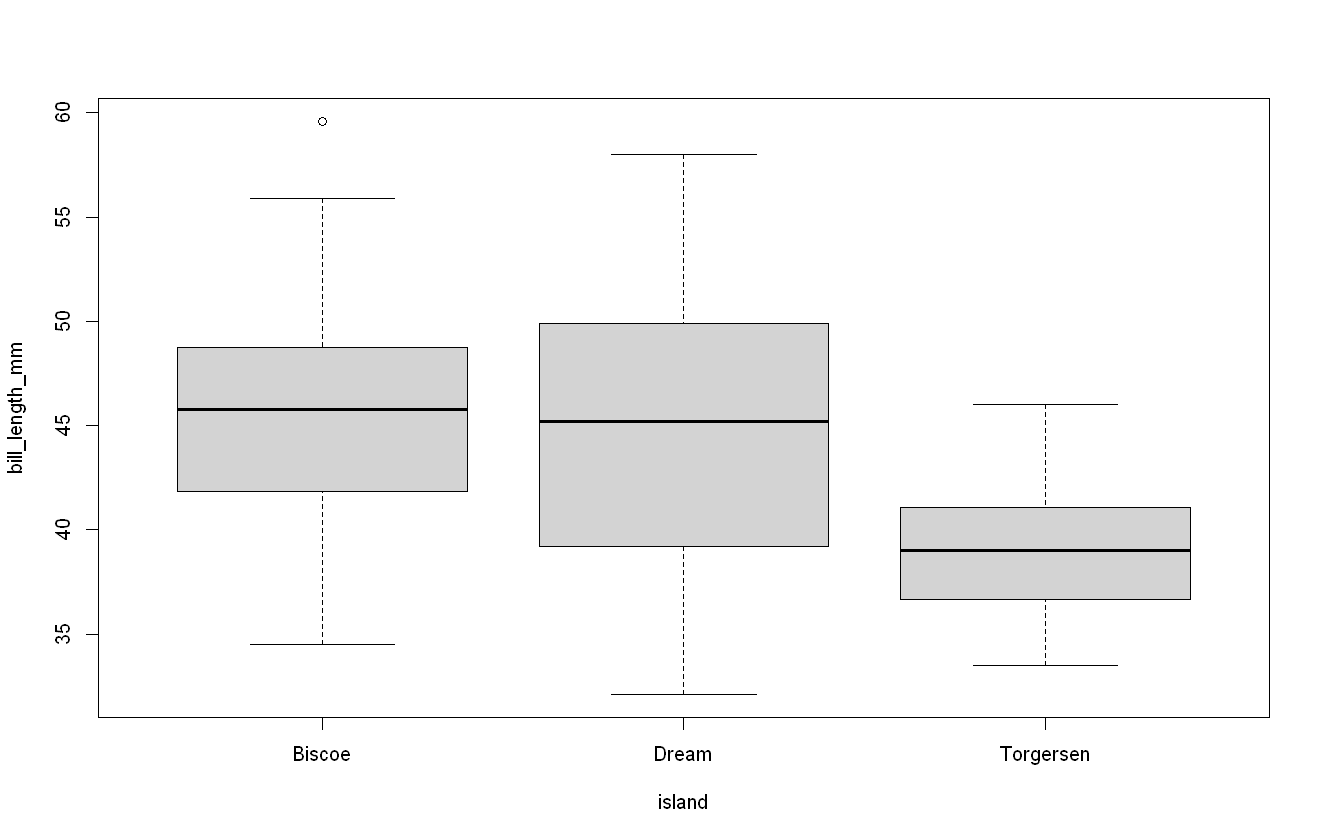

In [8]:
## zavislost na ostrove
lm(bill_length_mm~island,data=dat)
boxplot(bill_length_mm~island,data=dat)

## Úkol 1.d: Regresní model se všemi regresory

Prozkoumejte model lineární závislosti všech regresorech najednou, bez interakcí. Zjistěte, které proměnné jsou pro model signifikantní. Interpretujte hodnotu regresních koeficientů.

In [9]:
fit_tuc_bez_int=lm(bill_length_mm~flipper_length_mm+body_mass_g+species+sex+island,data=dat)
summary(fit_tuc_bez_int)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm + body_mass_g + 
    species + sex + island, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9889 -1.3974 -0.0769  1.2381 11.5027 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       18.8609232  4.0313800   4.679 4.25e-06 ***
flipper_length_mm  0.0757876  0.0232423   3.261  0.00123 ** 
body_mass_g        0.0012492  0.0004168   2.997  0.00294 ** 
speciesChinstrap   9.8486354  0.4256880  23.136  < 2e-16 ***
speciesGentoo      4.6808171  0.8012565   5.842 1.25e-08 ***
sexmale            2.3434667  0.3608741   6.494 3.13e-10 ***
islandDream       -0.5517196  0.4516408  -1.222  0.22275    
islandTorgersen   -0.1177267  0.4719577  -0.249  0.80318    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.229 on 325 degrees of freedom
Multiple R-squared:  0.8374,	Adjusted R-squared:  0.8339 
F-statistic: 239.1 on 7 and 325 DF,  p-value: <

## Úkol 1.e: Koeficient determinace + jednodušší model

Nafitujte zjednodušený model tím, že vyberte nejméně signifinaktní proměnnou a z modelu ji odstraníte. Porovnejte koeficienty determinace původního a zjednodušeného modelu.

Zkuste si koeficienty determinace spočítat také ručně pomocí reziduí modelů.

In [10]:
fit_tuc_bez_island=lm(bill_length_mm~flipper_length_mm+body_mass_g+species+sex,data=dat)
summary(fit_tuc_bez_island)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm + body_mass_g + 
    species + sex, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-6.862 -1.414 -0.072  1.251 11.495 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.864e+01  4.013e+00   4.644 4.95e-06 ***
flipper_length_mm 7.548e-02  2.301e-02   3.280  0.00115 ** 
body_mass_g       1.260e-03  4.162e-04   3.027  0.00267 ** 
speciesChinstrap  9.544e+00  3.512e-01  27.172  < 2e-16 ***
speciesGentoo     4.921e+00  7.304e-01   6.737 7.29e-11 ***
sexmale           2.336e+00  3.605e-01   6.480 3.37e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.228 on 327 degrees of freedom
Multiple R-squared:  0.8365,	Adjusted R-squared:  0.834 
F-statistic: 334.7 on 5 and 327 DF,  p-value: < 2.2e-16


In [11]:
## Koeficienty determinace pro puvodni model
r1=fit_tuc_bez_int$resid
y=dat$bill_length_mm

## soucty ctvercu
Se=sum(r1^2)
ST=sum( (y-mean(y))^2 )
Se
ST

## obycejny R^2
1-Se/ST

## adjustovany obycejny R^2
X=model.matrix(fit_tuc_bez_int)
n=dim(X)[1];k=dim(X)[2]-1
1-(Se/(n-k-1))/(ST/(n-1))

[1] 1614.409

[1] 9928.903

[1] 0.8374031

[1] 0.833901

<font color="blue">**Nyní zpět k výkladu.**</font>

---

## Úkol 2.a: Test model-podmodel

Pomocí F-testu prozkoumejte, zda je jednodušší model významně horší, než model původní.

Zkuste si také spočítat jeho testovou statistiku ručně pomocí reziduí.

In [12]:
anova(fit_tuc_bez_island,fit_tuc_bez_int,test="F")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,327,1622.982,NA,NA,NA,NA
2,325,1614.409,2,8.572771,0.8629009,0.4229007


In [13]:
## pro puvodni model
r1=fit_tuc_bez_int$resid
X1=model.matrix(fit_tuc_bez_int)
n=dim(X1)[1];k=dim(X1)[2]-1
Se=sum(r1^2)
Se
## pro podmodel model
r2=fit_tuc_bez_island$resid
X2=model.matrix(fit_tuc_bez_island)
r=dim(X2)[2]-1
Sp=sum(r2^2)
Sp
## statistika
Sp-Se
F=((Sp-Se)/(k-r))/(Se/(n-k-1))
F

[1] 1614.409

[1] 1622.982

[1] 8.572771

[1] 0.8629009

## Úkol 2.b: Model s interakcemi

Nafitujte model obsahující interakce všech řádů. Pokud by v některých kategoriích nebylo dost pozorování pro odhad, vhodně slučte úrovně faktorových proměnných.

In [14]:
fit_tuc_int=lm(bill_length_mm~flipper_length_mm*body_mass_g*species*sex*island,data=dat)
summary(fit_tuc_int)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm * body_mass_g * 
    species * sex * island, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-7.122 -1.337  0.031  1.134  9.515 

Coefficients: (32 not defined because of singularities)
                                                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                                                             3.745e+01  1.734e+02   0.216    0.829
flipper_length_mm                                                      -1.168e-02  9.220e-01  -0.013    0.990
body_mass_g                                                             7.070e-04  5.152e-02   0.014    0.989
speciesChinstrap                                                       -1.548e+02  3.104e+02  -0.499    0.618
speciesGentoo                                                           1.920e+02  3.653e+02   0.525    0.600
sexmale                                                                -8.356e+01  2.38

In [15]:
## nektere interakce neslo odhadnout, protoze v nekterych tridach nejsou pozorovani
table(dat$island,dat$species)

           
            Adelie Chinstrap Gentoo
  Biscoe        44         0    119
  Dream         55        68      0
  Torgersen     47         0      0

In [16]:
## sloucime kategorie 
spAdel=ifelse(dat$species=="Adelie","Adelie","Other")
isBisc=ifelse(dat$island=="Biscoe","Biscoe","Other")
fit_tuc_int=lm(bill_length_mm~flipper_length_mm*body_mass_g*spAdel*sex*isBisc,data=dat)
summary(fit_tuc_int)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm * body_mass_g * 
    spAdel * sex * isBisc, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3246 -1.3715 -0.0109  1.1746  9.5155 

Coefficients:
                                                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                                                    3.745e+01  1.725e+02   0.217    0.828
flipper_length_mm                                             -1.168e-02  9.170e-01  -0.013    0.990
body_mass_g                                                    7.070e-04  5.123e-02   0.014    0.989
spAdelOther                                                    1.920e+02  3.633e+02   0.528    0.598
sexmale                                                       -8.356e+01  2.376e+02  -0.352    0.725
isBiscOther                                                   -3.183e+02  2.607e+02  -1.221    0.223
flipper_length_mm:body_mass_g                                 -4.612e-07 

## Úkol 2.c: Test významnosti interakcí

Pomocí F-testu prozkoumejte, zda je model s interakcemi významně vyšší oproti modelu bez interakcí.

In [17]:
anova(fit_tuc_bez_int,fit_tuc_int,test="F")
## interakce nejsou vyznamne

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,325,1614.409,NA,NA,NA,NA
2,301,1445.625,24,168.7846,1.464308,0.07724935


## Úkol 2.d: Test poměrem věrohodností

Proveďte stejné testy jako v 2.a a 2.c pomocí testu poměrem věrohodností.

In [18]:
anova(fit_tuc_bez_int,fit_tuc_int,test="Chisq")
## taktez

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,325,1614.409,NA,NA,NA
2,301,1445.625,24,168.7846,0.0663026


<font color="blue">**Nyní zpět k výkladu.**</font>

---

## Úkol 3.a: Informační kritéria

Spočtěte Akaikeho a Bayesovské informační kritérium pro použité modely (bez interakcí, zjednodušená verze, s interakcemi).

Bonus: Zkuste kritéria spočítat ručně.

In [19]:
AIC(fit_tuc_bez_int,fit_tuc_bez_island,fit_tuc_int)

,df,AIC
,<dbl>,<dbl>
fit_tuc_bez_int,9,1488.681
fit_tuc_bez_island,7,1486.444
fit_tuc_int,33,1499.908


In [20]:
BIC(fit_tuc_bez_int,fit_tuc_bez_island,fit_tuc_int)

,df,BIC
,<dbl>,<dbl>
fit_tuc_bez_int,9,1522.954
fit_tuc_bez_island,7,1513.101
fit_tuc_int,33,1625.577


In [21]:
## vyjadrime verohodnost
## dosadime maximalne verohodny odhad s2=rss/n za sigma^2
r=fit_tuc_bez_island$resid
X=model.matrix(fit_tuc_bez_island)
n=dim(X)[1];k=dim(X)[2];
s2=sum(r^2)/n
l=-n/2*(log(2*pi*s2)+1)
## AIC=2*pocparam-2*verohodnost
2*(k+1)-2*l

[1] 1486.444

## Úkol 3.b: Sekvenční výběr

Zvolte vhodně minimální a maximální model a nalezněte optimální model pomocí sekvenčního výběru.

In [22]:
step(lm(bill_length_mm~1,data=dat),scope=list(lower=~1,upper=~flipper_length_mm*body_mass_g*spAdel*sex*isBisc))

Start:  AIC=1132.56
bill_length_mm ~ 1

                    Df Sum of Sq    RSS     AIC
+ spAdel             1    6946.1 2982.8  734.10
+ flipper_length_mm  1    4235.0 5693.9  949.39
+ body_mass_g        1    3449.8 6479.1  992.41
+ sex                1    1175.5 8753.4 1092.60
+ isBisc             1     503.4 9425.5 1117.23
<none>                           9928.9 1132.56

Step:  AIC=734.1
bill_length_mm ~ spAdel

                    Df Sum of Sq    RSS     AIC
+ sex                1    1130.5 1852.4  577.45
+ body_mass_g        1     237.2 2745.7  708.51
+ flipper_length_mm  1     118.1 2864.7  722.65
+ isBisc             1      31.3 2951.6  732.59
<none>                           2982.8  734.10
- spAdel             1    6946.1 9928.9 1132.56

Step:  AIC=577.45
bill_length_mm ~ spAdel + sex

                    Df Sum of Sq    RSS     AIC
+ isBisc             1      34.0 1818.4  573.29
+ spAdel:sex         1      19.8 1832.5  575.87
<none>                           1852.4  577.45
+ b


Call:
lm(formula = bill_length_mm ~ spAdel + sex + isBisc + flipper_length_mm + 
    body_mass_g + spAdel:isBisc + flipper_length_mm:body_mass_g + 
    sex:body_mass_g + spAdel:sex, data = dat)

Coefficients:
                  (Intercept)                    spAdelOther                        sexmale                    isBiscOther              flipper_length_mm                    body_mass_g  
                    5.882e+01                      3.444e+00                      7.860e+00                     -2.838e-01                     -1.424e-01                     -8.102e-03  
      spAdelOther:isBiscOther  flipper_length_mm:body_mass_g            sexmale:body_mass_g            spAdelOther:sexmale  
                    5.721e+00                      5.161e-05                     -1.516e-03                      9.979e-01  


## Úkol 3.c: Interpretace

Výsledný model nafitujte a interpretujte hodnoty odhadnutých koeficientů.

Vidíme, že:

- Důležitými parametry je všech pět proměnných v lineárním tvaru + několik dvojných interakcí. 
- Průměrná velikost zobáku se všemi nulovými regresory je 0.5882 g (ale takoví tučňáci nejsou).
- Pokud tučňák není druhu Adelie, je průměrná velikost o 3.444 mm vyšší oproti Adelie
- Samci mají v průměru zobák o 7.860 mm větší než samice
- Pokud tučňák není z ostrova Biscoe, je průměrná velikost o 0.2838 mm menší oproti Biscoe
- Za každý milimetr délky křídla klesá délka zobáku v průměru o 0.1424 mm.
- Za každý gram váhy klesá délka zobáku v průměru o 0.0081 mm.
- Tento vliv je doprovázen interakcemi.